# Strandbox

## Dataset (DO NOT EXECUTE THIS SECTION)

Dataset consist of scientific articles from 3 different journals:
1. Environmental Innovation and Societal Transitions (EIST)
2. Research in the Sociology of Organizations (RSOG)
3. Sustainability Science (SusSci)


|         | # Articles before preprocessing | # Articles after preprocessing |
|---------|---------------------------------|--------------------------------|
| EIST    | 683                             | 574                            |
| RSOG    | 659                             | 639                            |
| Sus-Sci | 1191                            | 1121                           |

In [2]:
import json
import pandas as pd

In [2]:
data_path = 'data/extract_EIST.json'
with open(data_path, 'r') as fd:
    data = json.load(fd)
df = pd.DataFrame(data).T
df.head()

file_name  \
1  -It-s-not-talked-about---The-risk-of-failure-_...   
2  -Making-energy-transition-work---Bricolage-_20...   
3                      1-s2.0-S2210422419302618-main   
4                      1-s2.0-S2210422419302850-main   
5                      1-s2.0-S2210422420300277-main   

                          doi  \
1  10.1016/j.eist.2020.02.008   
2  10.1016/j.eist.2020.07.005   
3  10.1016/j.eist.2019.10.005   
4  10.1016/j.eist.2019.11.008   
5  10.1016/j.eist.2020.02.001   

                                               title  \
1  “It's not talked about”: The risk of failure i...   
2  “Making energy transition work”: Bricolage in ...   
3  Thinking about individual actor-level perspect...   
4  Not more but different: A comment on the trans...   
5  Let's focus more on negative trends: A comment...   

                                            abstract  \
1  Scholars of sustainability transition have giv...   
2  In the quest for energy transition pathways, e...   
3  The 2019 STRN research agenda identifies conne...   
4  The sustainability transitions research networ...   
5  Much has been written on sustainability transi...   

                                                text location  year  \
1  {'Introduction': ' A transition away from the ...       UK  2020   
2  {'Introduction': ' Local energy transitions ha...  Austria  2020   
3  {'Introduction: background and rationale': ' T...  Germany  2020   
4  {'Introduction': ' The comprehensive agenda fo...       UK  2020   
5  {'Introduction': ' The analysis of sustainabil...       UK  2020   

                                             authors  
1                                     [Beck Collins]  
2         [Johannes Suitner, Martha Ecker, T U Wien]  
3      [Paul Upham, Paula Bögel, Elisabeth Dütschke]  
4  [Debbie Hopkins, Johannes Kester, Toon Meelen,...  
5  [Miklós Antal, Giulio Mattioli, Imogen Rattle,...

In [46]:
df.loc[1,'abstract']

'Scholars of sustainability transition have given much attention to local experiments in ‘protected spaces’ where system innovations can be initiated and where learning about those innovations can occur. However, local project participants’ conceptions of success are often different to those of transition scholars; where scholars see a successful learning experience, participants may see a project which has failed to “deliver”. This research looks at two UK case studies of energy retrofit projects – Birmingham Energy Savers and Warm Up North, both in the UK, and the opportunities they had for learning. The findings suggest that perceptions of failure and external real world factors reducing the capacity to experiment, meant that opportunities for learning were not well capitalised upon. This research makes a contribution to the sustainability transitions literature which has been criticised for focusing predominantly on successful innovation, and not on the impact of failure. © 2020 El

In [3]:
data_path = 'data/prepro_EIST.json'
with open(data_path, 'r') as fd:
    data = json.load(fd)
df = pd.DataFrame(data)

In [4]:
df.head()

title  \
0  “It's not talked about”: The risk of failure i...   
1  “It's not talked about”: The risk of failure i...   
2  “It's not talked about”: The risk of failure i...   
3  “It's not talked about”: The risk of failure i...   
4  “It's not talked about”: The risk of failure i...   

                                            abstract  \
0  Scholars of sustainability transition have giv...   
1  Scholars of sustainability transition have giv...   
2  Scholars of sustainability transition have giv...   
3  Scholars of sustainability transition have giv...   
4  Scholars of sustainability transition have giv...   

                                                text  id  time class  
0  scholar sustainability transition given attent...   0  2020  EIST  
1  transition use fossil fuel heat power ineffici...   0  2020  EIST  
2  provide obstacle transfer learning following h...   0  2020  EIST  
3  multi level perspective socio technical transi...   0  2020  EIST  
4  research based comparative case study local ex...   0  2020  EIST

In [47]:
df['text'][0]

'scholar sustainability transition given attention local experiment protected space system innovation initiated learning innovation occur local project participant conception success different transition scholar scholar successful learning experience participant project failed deliver research look case study energy retrofit project birmingham energy saver warm north uk opportunity learning finding suggest perception failure external real world factor reducing capacity experiment meant opportunity learning capitalised research make contribution sustainability transition literature criticised focusing successful innovation impact failure'

## Topic modelling

### 1. LDA Optimal number of topics

(-0.5, 575.5, 431.5, -0.5)

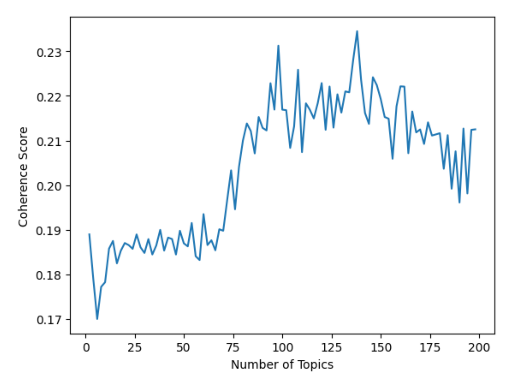

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('disp/3journals_optim.png')
plt.imshow(img)
plt.axis('off')

### 2. Topic Network

In [1]:
from IPython.display import IFrame

IFrame(src='disp/topic_network_3_journals_antons.html', width=900, height=700)

#### 2.1 Network Centrality

In [11]:
df = pd.read_csv('disp/centrality_full_network.csv')
df.sort_values(by=['Degree Centrality'], ascending=False).head(7)

Unnamed: 0                                     Topic  Degree Centrality  \
0             0    0_interview_data_conducted_participant          59.430657   
5             5  5_transformation_actor_change_transition          38.277372   
9             9      9_emission_scenario_reduction_carbon          36.262774   
2             2      2_complexity_system_approach_process          29.211679   
137         137          137_game_approach_process_change          25.182482   
4             4                4_area_land_water_scenario          23.167883   
15           15     15_forest_land_scenario_deforestation          23.167883   

     Degree per Article  Betweenness Centrality  Betweenness per Article  \
0              0.716032             2213.512033                26.668820   
5              0.797445              806.733079                16.806939   
9              0.614623              936.007673                15.864537   
2              0.561763              470.744724                 9.052783   
137            1.144658              213.092696                 9.686032   
4              0.413712              288.320436                 5.148579   
15             0.772263              252.689720                 8.422991   

     Clustering  
0      0.130918  
5      0.180654  
9      0.163492  
2      0.182266  
137    0.303333  
4      0.245059  
15     0.245059

#### 2.2 Topic Co-occurrence Distribution

In [3]:
import plotly.express as px
df = pd.read_csv('disp/edge_weight_dist_full_network.csv')
fig = px.pie(df, values='%', names='Edge Weight')
fig.show()

### 3. Topics Landscape

In [15]:
df = pd.read_csv('disp/3_journals_topics.csv')
df = df.rename(columns={'Volumne': 'Volume'})
df.head()

Unnamed: 0                                Topic Label  topic_nr  \
0           1     0_interview_data_conducted_participant         0   
1           2       1_university_student_school_stanford         1   
2           3       2_complexity_system_approach_process         2   
3           4  3_sustainability_research_student_science         3   
4           5                 4_area_land_water_scenario         4   

                                     most_freq_words  rep_doc_year  \
0  ['interview', 'data', 'conducted', 'participan...          2020   
1  ['university', 'student', 'school', 'stanford'...          2010   
2  ['complexity', 'system', 'approach', 'process'...          2020   
3  ['sustainability', 'research', 'student', 'sci...          2021   
4  ['area', 'land', 'water', 'scenario', 'forest'...          2019   

                                               title Volume  \
0     Sharing among neighbours in a Norwegian suburb     37   
1  Chapter 23: The Stanford organizational studie...     28   
2  SHIFT IN HYBRIDITY IN RESPONSE TO ENVIRONMENTA...     69   
3  The patterns of curriculum change processes th...   16.0   
4  The seasonal and scale-dependent associations ...   14.0   

                                            Authors  
0  Westskog H., Aase T.H., Standal K., Tellefsen S.  
1                                     Meyerson D.E.  
2      Ramus T., Vaccaro A., Versari P., Brusoni S.  
3                Weiss M., Barth M., von Wehrden H.  
4     Aiba M., Shibata R., Oguro M., Nakashizuka T.

### 4. Topics vs Documents

(-0.5, 1999.5, 1499.5, -0.5)

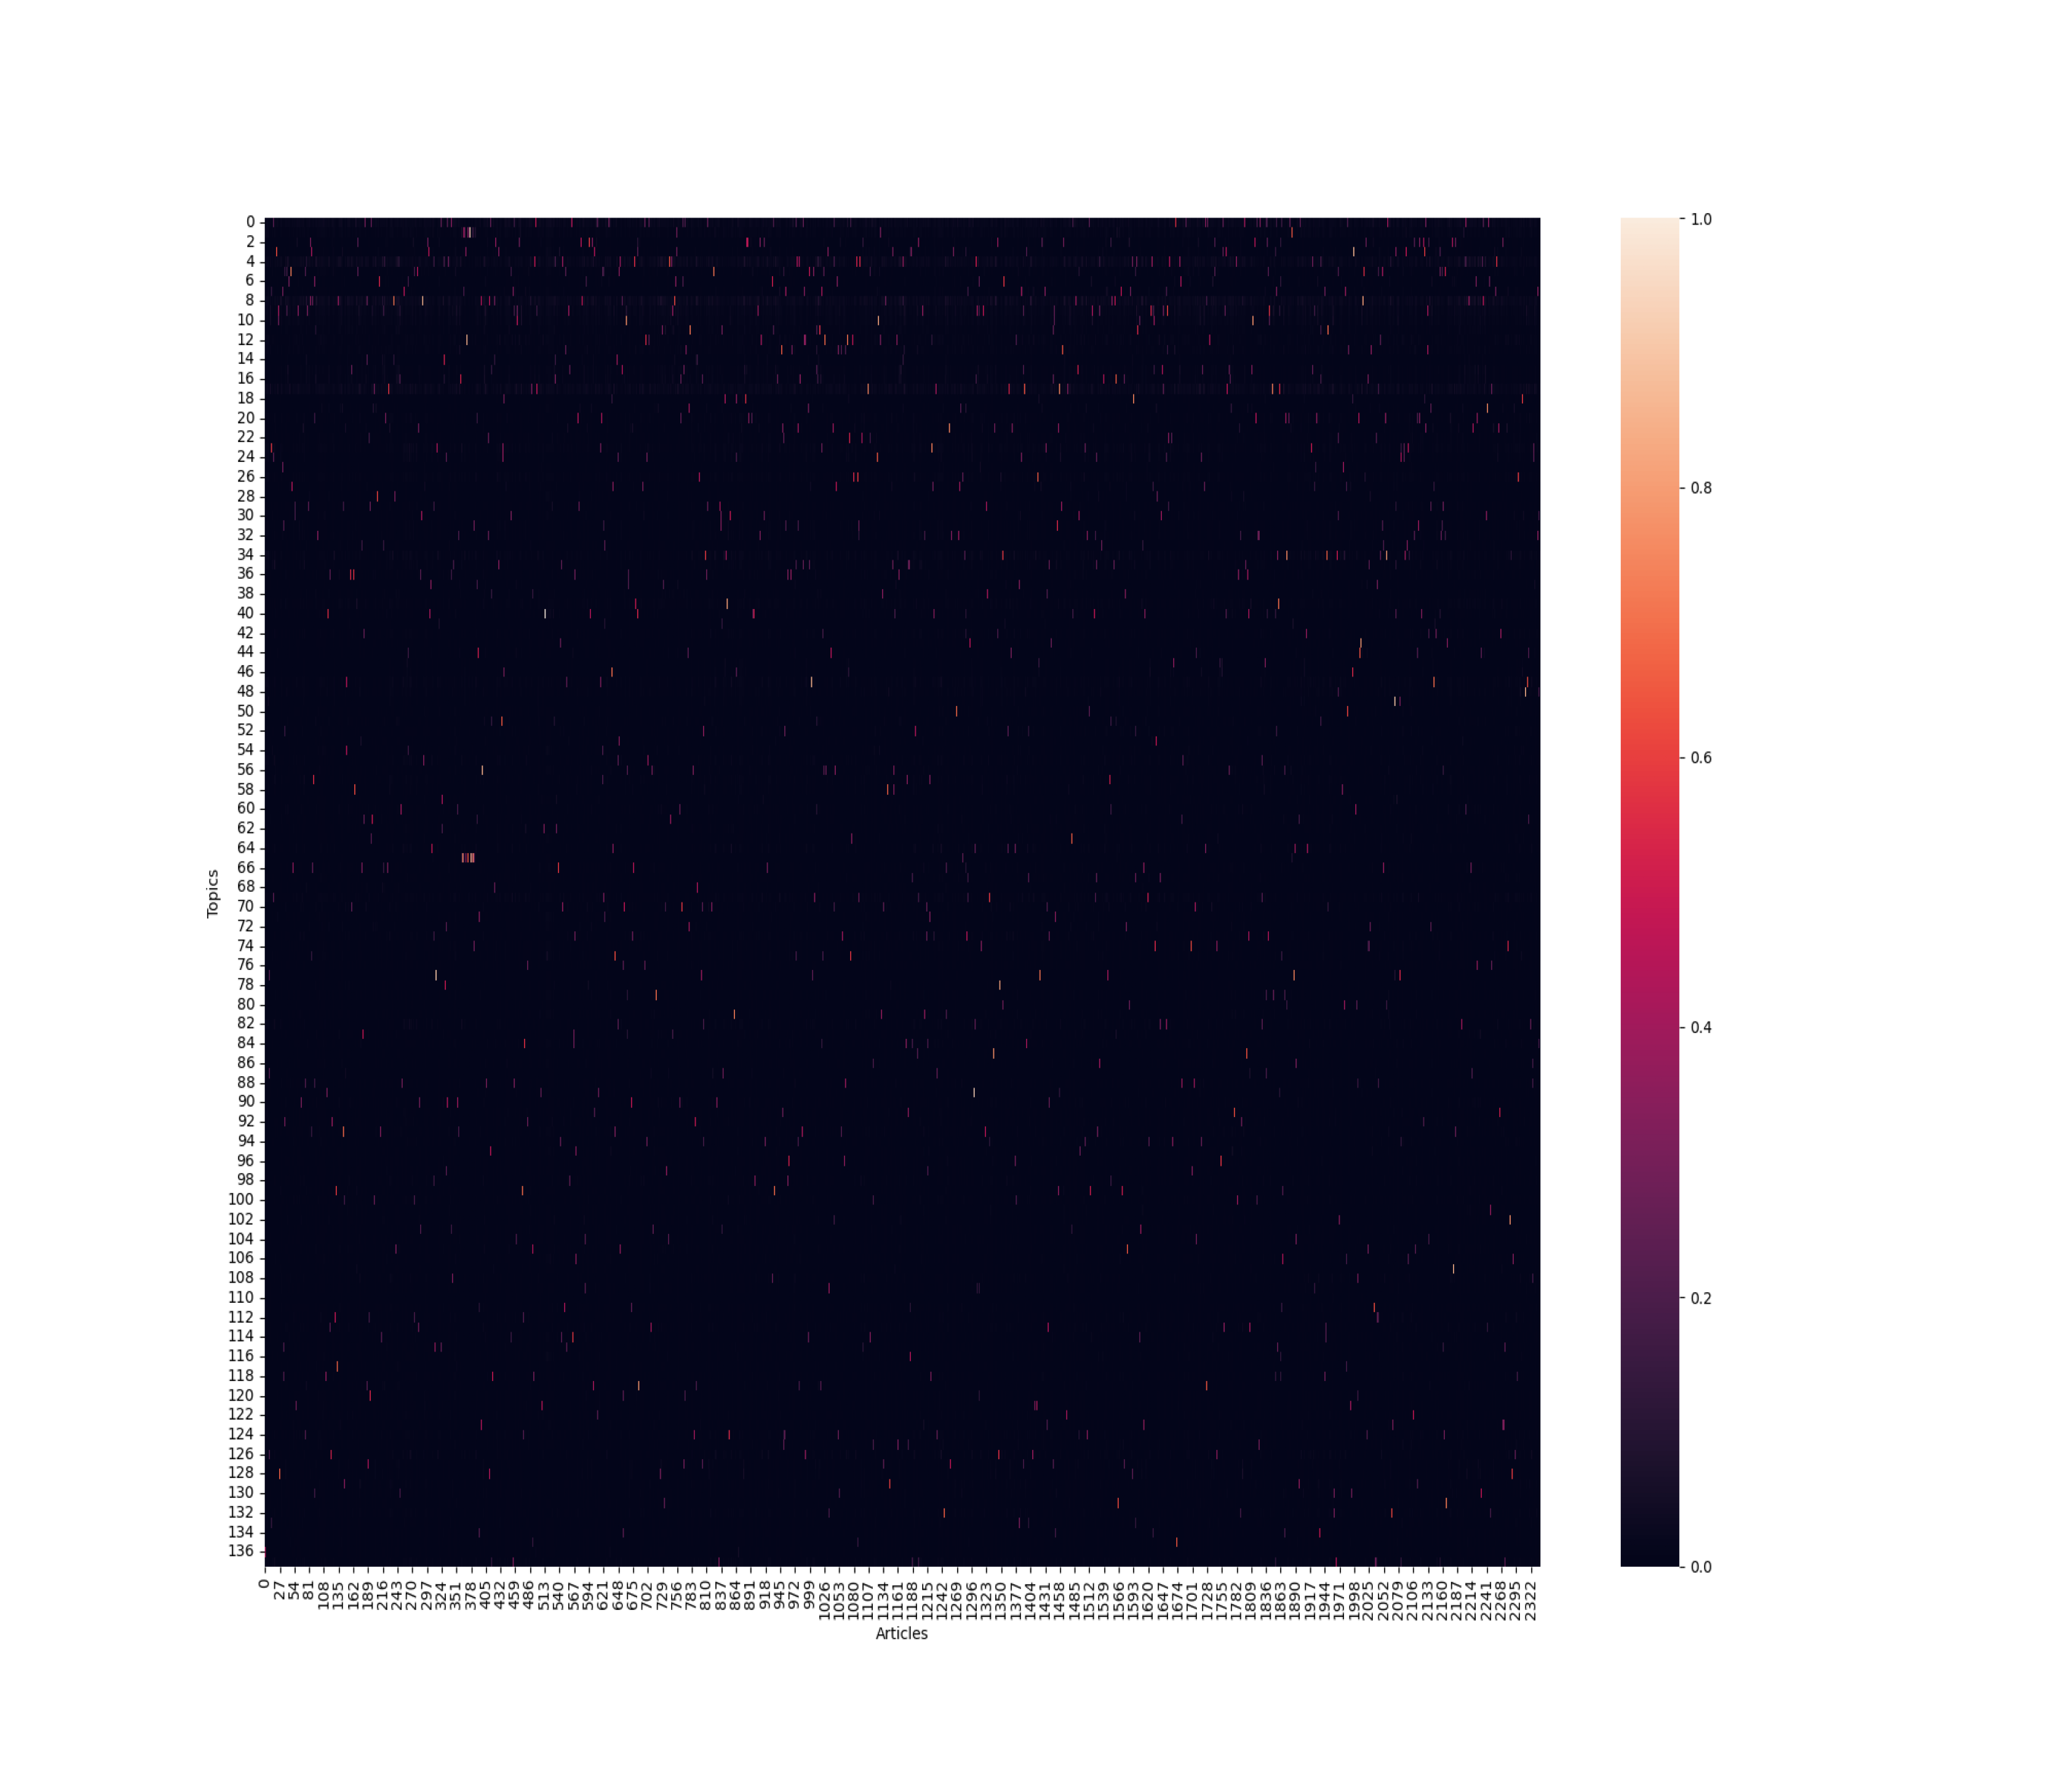

In [67]:
plt.figure(figsize = (35,30))
img = mpimg.imread('disp/3_journals.png')
plt.imshow(img, aspect='auto')
plt.axis('off')

### 5. Hierarchical Plots

#### EIST Topics

In [4]:
from IPython.display import IFrame

IFrame(src='disp/hierarchical_topics_eist.html', width=1000, height=1000)

#### RSOG Topics

In [5]:
from IPython.display import IFrame

IFrame(src='disp/hierarchical_topics_rsog.html', width=1000, height=1000)

#### Sus-Sci Topics

In [6]:
from IPython.display import IFrame

IFrame(src='disp/hierarchical_topics_sus_sci.html', width=1000, height=1200)

#### Combined 3 journals

In [7]:
from IPython.display import IFrame

IFrame(src='disp/hierarchical_topics_3_journals.html', width=1000, height=1400)

## Insights

### 1. Descriptive Statistics

In [68]:
df = pd.read_csv('disp/descriptive_stats_3_journals.csv')
df.head()

Unnamed: 0                                Topic Label  standardized_mean  \
0           0     0_interview_data_conducted_participant              3.637   
1           1       1_university_student_school_stanford              1.789   
2           2       2_complexity_system_approach_process              1.542   
3           3  3_sustainability_research_student_science              1.447   
4           4                 4_area_land_water_scenario              3.686   

     max  min  
0  0.560  0.0  
1  0.951  0.0  
2  0.630  0.0  
3  0.863  0.0  
4  0.854  0.0

### 2. Temporal Trajectory

In [17]:
df = pd.read_csv('disp/3_journals_temp_dev_trajc.csv')
df.head()

Unnamed: 0                                topic_label  count    year_mean  \
0           0     0_interview_data_conducted_participant     83  2015.153846   
1           1       1_university_student_school_stanford     17  2015.500000   
2           2       2_complexity_system_approach_process     52  2016.083333   
3           3  3_sustainability_research_student_science     36  2015.692308   
4           4                 4_area_land_water_scenario     56  2015.076923   

   year_std  year_min  year_max  coeff_linear  coeff_quadratic  \
0  5.446893      2001      2022        0.7577           0.0673   
1  3.905125      2010      2021       -0.8770           0.1167   
2  4.050892      2009      2022        0.4452           0.0382   
3  4.120952      2009      2022        0.2857           0.0407   
4  4.730613      2007      2022        0.4114           0.0731   

   coeff_linear_of_quadratic  
0                     0.7577  
1                    -0.8770  
2                     0.4452  
3                     0.2857  
4                     0.4114

In [21]:
import numpy as np
df['year_mean'] = np.around(df['year_mean'], 3)
df['year_std'] = np.around(df['year_std'], 3)

In [27]:
df.drop(['coeff_linear_of_quadratic'], axis=1).to_csv('3_journals_temp_dev_trajc.csv')

### 3. Temporal Trends

#### 3.1. Hot topics

In [8]:
from IPython.display import IFrame

IFrame(src='disp/3_journals_hot.html', width=1000, height=600)

#### 3.2 Cold Topics

In [9]:
from IPython.display import IFrame

IFrame(src='disp/3_journals_cold.html', width=1000, height=600)

#### 3.3. Reviving Topics

In [10]:
from IPython.display import IFrame

IFrame(src='disp/3_journals_reviving.html', width=1000, height=600)

#### 3.4. Evergreen Topics

In [11]:
from IPython.display import IFrame

IFrame(src='disp/3_journals_evergreen.html', width=1000, height=600)

#### 3.5. Wallflower Topics

In [12]:
from IPython.display import IFrame

IFrame(src='disp/3_journals_wallflowers.html', width=1000, height=600)

## Author Discourse Network Mapping

In [13]:
from IPython.display import IFrame

IFrame(src='disp/continous_color.html', width=900, height=600)

### 1. Author Colaboration Network

In [14]:
from IPython.display import IFrame

IFrame(src='disp/colab_network.html', width=1000, height=600)

### 2. Author Colaboration within their own community

In [15]:
from IPython.display import IFrame

IFrame(src='disp/within_form_colab_network.html', width=1000, height=600)

### 3. Author Colaboration outside their community

In [16]:
from IPython.display import IFrame

IFrame(src='disp/outside_form_colab_network.html', width=1000, height=600)

### 4. Discovering new discourse community

In [17]:
from IPython.display import IFrame

IFrame(src='disp/new_discourse.html', width=1000, height=600)

### 5. Colaboration with new discourse Community

In [18]:

from IPython.display import IFrame

IFrame(src='disp/network_with_new_cluster.html', width=1000, height=600)

### 6. Interstitial Community

In [19]:
#(0.33+-0.02, 0.33+-0.02, 0.33+-0.02)

from IPython.display import IFrame

IFrame(src='disp/network_with_interstitial_cluster.html', width=1000, height=600)

## Mechanism used for Discourse Network Mapping 

Inspired from the work by [Oberg, A., Korff, V. P., & Powell, W. W. (2017)](https://www.emerald.com/insight/content/doi/10.1108/S0733-558X20170000053001/full/html)

### Differentiation

In [20]:
from IPython.display import IFrame

IFrame(src='results/simulation/differentiation.html', width=1000, height=600)

### Integration

In [21]:
from IPython.display import IFrame

IFrame(src='results/simulation/integration.html', width=1000, height=600)

### Interstitial

In [22]:
from IPython.display import IFrame

IFrame(src='results/simulation/interstitial.html', width=1000, height=600)

### Recombination

In [23]:
from IPython.display import IFrame

IFrame(src='results/simulation/recombination.html', width=1000, height=600)